In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Here, I want to reproduce FIG. 5 of the paper regarding the threshold tuning of the energy deposit.
#The first one regards the deposit for zero field case. First, I will define the parameters of the SMM.

U = 100 #K
tau_0 = 4.23e-9 #s
#E_zee = 0
alpha = 1e-7 * (1e9)**2 #nm2/s
c_0 = 2e-9 #eV/K4/nm3
rho_s = 1 #nm^-3

In [29]:
#The threshold can be put as forcing Eq. 7 to be an equality:

def energy_deposit(r, E_zee):
    numerator = c_0*(r**3)*(U* - 0.5*E_zee*(1.6e4))**4
    denominator = np.log(r**2/(tau_0 * alpha))
    return ((numerator/(denominator)**4) - rho_s*(r**3)*E_zee)

def energy_deposit2(r, E_zee):
    numerator = c_0*(r**3)*(U - 0.5*E_zee*(1.6e4))**4
    denominator = np.log(r**2/(tau_0 * alpha))
    return ((numerator/(denominator)**4))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


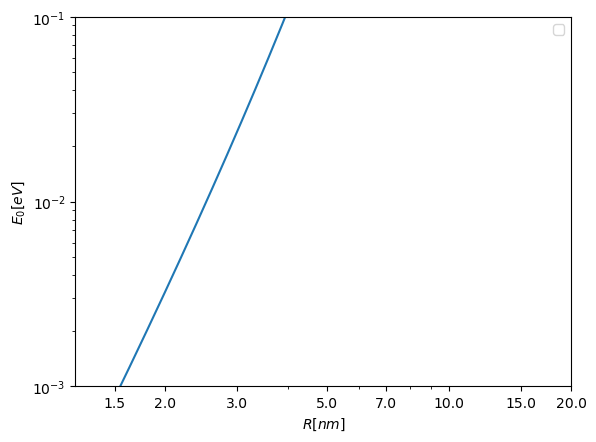

In [31]:
range = np.linspace(1.2,20,1000)
ezee = [0,0.001e-3*(1.6e4), 0.01e-3*(1.6e4), 0.1e-3*(1.6e4)]
list_of_values1 = [energy_deposit(x,0) for x in range]
list_of_values2 = [energy_deposit(x,0.001e-3) for x in range]
list_of_values3 = [energy_deposit(x,0.01e-3) for x in range]
list_of_values4 = [energy_deposit(x,0.1e-3) for x in range]
list_of_values5 = [energy_deposit2(x, 1e-4) for x in range]


plt.plot(range, list_of_values5)
#plt.plot(range,list_of_values1,label='$\Delta E_{Zee} = 0 meV$')
#plt.plot(range, list_of_values2, label='$\Delta E_{Zee} = 1e-5 meV$')
#plt.plot(range, list_of_values3, label='$\Delta E_{Zee} = 0.01 meV$')
#plt.plot(range, list_of_values4, label='$\Delta E_{Zee} = 0.1 meV$')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1.2,20)
plt.ylim(0.001,0.1)
plt.xticks(ticks=[1.5,2.0,3.0,5.0,7.0,10.0,15,20], labels=[1.5,2.0,3.0,5.0,7.0,10.0,15.0,20.0])
plt.ylabel('$E_0[eV]$')
plt.xlabel('$R[nm]$')
plt.legend()

In [ ]:
'''This curve tells us abou the minimum energy necessary to trigger the reaction. In average we have R = 2-3nm, so we must expect that the energy be above 1e-2 eV.'''